## 1. Введение

Статистика очень тесно связана с машинным обучением. Этот раздел математики помогает ответить, какие из признаков важны, позволяет выдвигать и проверять гипотезы и идеи. Статистика лежит в основе алгоритмов машинного обучения, методов разведывательного анализа данных.

<p style="background: aquamarine;  width:960px; text-align: left; padding: 10px">
<b>Математическая статистика</b> — раздел математики, который занимается систематизацией и обработкой данных для их использования и получения выводов.

Данные, собранные в ходе исследования каких-то явлений или процессов, сами по себе не очень информативны. Чтобы извлечь из данных какие-то полезные идеи, применяется **описательная статистика**, которую мы и будем изучать в этом модуле.

<p style="background: aquamarine;  width:960px; text-align: left; padding: 10px">
<b>Статистические данные</b> — упорядоченные, классифицированные данные о каком-то явлении или процессе.

Так как в процессе получения статистических данных появляются новые признаки, то этот процесс касается не только математической статистики, но и **проектирования признаков** — ещё одной части разведывательного анализа данных, который будет изучен в следующем модуле. 

## 2. Описательная статистика. Меры центральной тенденции в Python

Когда вы описываете и вычисляете характеристики одной переменной, вы выполняете **одномерный анализ**. 

Когда вы анализируете пару переменных и больше, то вы делаете **многомерный анализ**. Целью такого анализа является нахождение связей между признаками. 

**Вычисление среднего** также относится к одномерному анализу. Но что значит среднее? Чтобы ответить на этот вопрос, нам необходимо знать, что такое мера центральной тенденции.

<p style="background: aquamarine;  width:960px; text-align: left; padding: 10px">
<b>Мера центральной тенденции</b> — это число, которое описывает так называемое «среднее» признака. Мера центральной тенденции может рассчитываться по-разному в зависимости от типа признака или от его распределения.

Мы будем пользоваться библиотекой *statistics*. Она предоставляет готовые функции для вычисления математической статистики для числовых данных.

In [ ]:
pip install statistics

In [ ]:
# Импортируем библиотеку для дальнейшего использования:
import statistics

[Документация библиотеки statistics](https://docs.python.org/3/library/statistics.html#statistics.mean)

In [2]:
import pandas as pd
import statistics

df = pd.read_csv('data/wine_cleared.csv')

<center>$\color{green}{\text{СРЕДНЕЕ АРИФМЕТИЧЕСКОЕ}}$</center>

In [3]:
round(statistics.mean(df['price']), 2)

35.36

 <p style="background: #E1DEDE; border:1px black  solid;  width:960px; text-align: left; padding: 10px">
<b>Среднее арифметическое</b> хорошо работает для признаков с небольшим разбросом в значениях, например чтобы корректно вычислять средний возраст популяции. Однако оно плохо работает для признака с большим разбросом в значениях. 

<center>$\color{green}{\text{МЕДИАНА}}$</center>

<p style="background: aquamarine;  width:960px; text-align: left; padding: 10px">
<b>Медиана</b> — средний элемент распределения. Для расчёта медианы должно выполняться одно условие: числовой ряд должен быть предварительно отсортирован. Только так мы сможем корректно рассчитать средний элемент. Признак может быть отсортирован как по возрастанию, так и по убыванию. 

Методы современных библиотек, в том числе и используемой нами statistics для вычисления медианы, самостоятельно выполняют сортировку данных — вам не нужно заботиться об этом. 

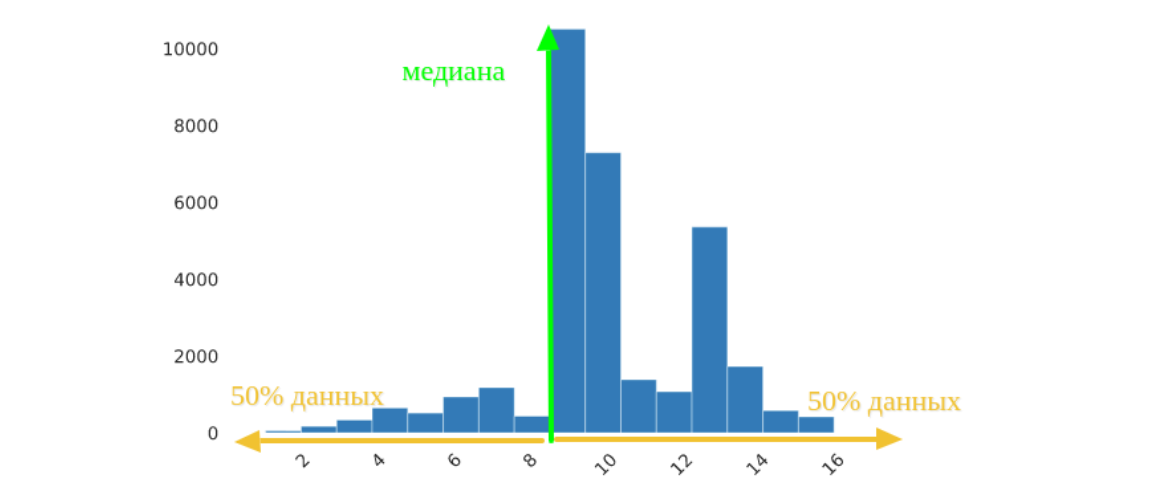

<center>Медиана делит распределение признака ровно пополам

Если количество элементов чётное, медианой будет среднее арифметическое двух средних элементов распределения.

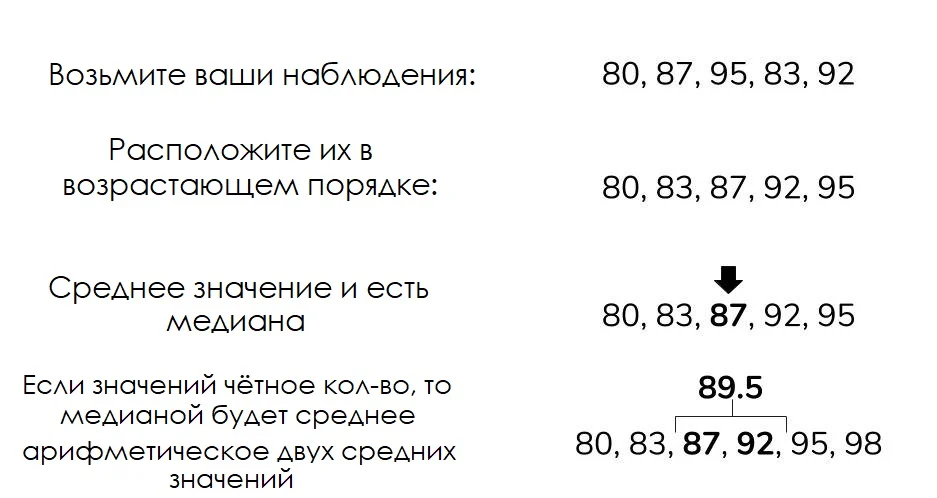

In [4]:
round(statistics.median(df['price']), 2)

28.0

In [38]:
count_price = len(df['price']) # количество записей цен
df_sorted = sorted(df['price'])
def get_median(num):
    if len(num)%2 == 0:
        return num[int((round(len(num)) + round(len(num)) - 1)/2)]
    if len(num)%2 != 0:
        return num[int(round(len(num))/2)]
print(get_median(df_sorted))        

28.0


In [ ]:
# ИЛИ
count_price = len(df['price']) # количество записей цен
sorted_price = sorted(df['price']) # отсортированные цены

if count_price % 2: # при нечетном кол-ве элементов выбираем средний по индексу 
    median = sorted_price[round(0.5*(count_price-1))]
else: # при четном кол-ве элементов выбираем 2 средних по индексу и считаем между ними среднее арифметическое
    index = round(0.5 * count_price)
    median_ = 0.5 * (sorted_price[index-1] + sorted_price[index])
median

Также в библиотеке *statistics* есть функции, связанные с медианой, — функция *statistics.median_low()* и функция *statistics.median_high()*.

→ В случае, когда количество элементов в числовом ряду (серии) нечётное, функции возвращают то же, что и *median()*.

В случае, когда количество элементов чётное, у нас получается два средних значения:

- *median_low()* возвращает меньшее из них;
- *median_high()* возвращает большее из них.

 <p style="background: #E1DEDE; border:1px black  solid;  width:960px; text-align: left; padding: 10px">
<b>Примечание</b>. Если в вашем наборе данных есть пропущенные значения, функции библиотеки statistics в отличие от других методов (например np.median() из библиотеки numpy) будут автоматически игнорировать пропущенные значения, не выдавая ошибку.

<center>$\color{green}{\text{МОДА}}$</center>

<p style="background: aquamarine;  width:960px; text-align: left; padding: 10px">
<b>Мода</b> — самый часто встречающийся элемент в числовом ряду.

Чаще всего мода используется в **нечисловых рядах**. Например самая популярная порода собак, фильм года, лучшие рестораны вычисляются именно модой.

In [40]:
round(statistics.mode(df['price']), 2)

35.36

In [ ]:
# ИЛИ 
mode = round((df['price'].value_counts().index[0]), 2)

 <p style="background: #E1DEDE; border:1px black  solid;  width:960px; text-align: left; padding: 10px">
Моду также можно вычислить при помощи <b>statistics.multimode()</b>. В случае наличия нескольких модовых (популярных значений) функция <b>statistics.mode()</b> вернёт вам ошибку StatisticsError, а statistics.multimode() — список с всеми вычисленными модовыми значениями.

Мы рассмотрели самые основные и часто используемые в машинном обучении меры центральной тенденции. Также к мерам центральной тенденции относятся:

- среднее геометрическое;
- среднее гармоническое;
- средневзвешенное и другие.
Их также можно вычислить с помощью библиотеки *statistics*, но они реже используются для описания распределения в машинном обучении.

## 3. Корреляция

<p style="background: aquamarine;  width:960px; text-align: left; padding: 10px">
<b>Корреляция</b> — статистическая связь двух и более переменных. При изменении значения одной из переменных происходит закономерное изменение другой или других величин. 

Мерой связи величин, мерой корреляции является коэффициент корреляции. Он может принимать значение от -1 до +1.

**Отрицательная корреляция**, коэффициент корреляции < 0 говорит об обратной связи между переменными. При обратной связи увеличение одной из величин ведёт к закономерному уменьшению другой (других) величин. 

**Положительная корреляция**, коэффициент корреляции > 0 говорит о прямой связи между переменными. При прямой связи увеличение одной из величин ведёт к закономерному увеличению другой (других) величин. 

**Коэффициент корреляции = 0** говорит о том, что переменные независимы друг от друга, по крайней мере линейно, но это вовсе не значит, что между ними нет какой-то более сложной взаимосвязи. Это достаточно редкое явление, которое может встретиться на конкретном наборе данных.

<p style="background: aquamarine;  width:960px; text-align: left; padding: 10px">
Понимание корреляции приводит нас к понятию <b>мультиколлинеарности</b> — такой сильной зависимости переменных друг от друга, что она затрудняет анализ и оценку будущей модели машинного обучения. 

Как понять, существует ли сильная взаимозавимость признаков? Для этого существует примерная шкала степеней силы связи и коэффициента корреляции между признаками. В таблице отражены основные силы связи между признаками:

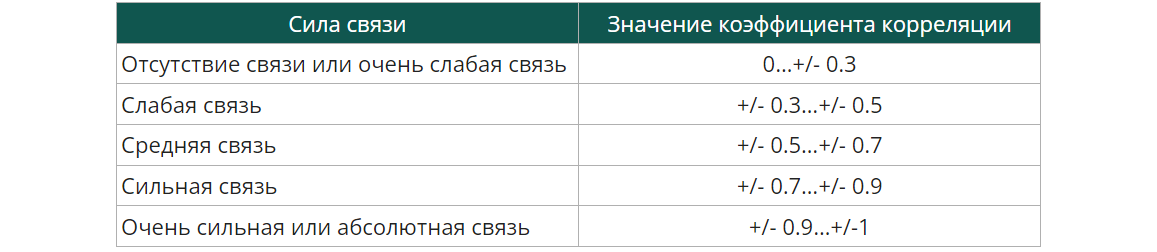

 <p style="background: #E1DEDE; border:1px black  solid;  width:960px; text-align: left; padding: 10px">
Принято считать, что при коэффициенте корреляции +/-0,7 связь между признаками сильная и приводит к мультиколлинеарности.

Для этапа корреляционного анализа достаточно делать и запоминать выводы о взаимосвязях признаков, чтобы на дальнейшем этапе разведывательного анализа данных правильно их обработать.

Для расчёта коэффициента корреляции применяют функцию **df.corr()** [библиотеки *pandas*](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)

Результатом функции **df.corr()** является матрица корреляции. 

<p style="background: aquamarine;  width:960px; text-align: left; padding: 10px">
<b>Матрица корреляции</b> — таблица, заголовками и строками которой являются названия признаков в датасете. На пересечении строк и столбцов находится значение коэффициента корреляции этих двух признаков.

Данная матрица имеет значение 1 по главной диагонали, так как единица означает корреляцию признака с самим собой. Матрица является **симметричной**. 

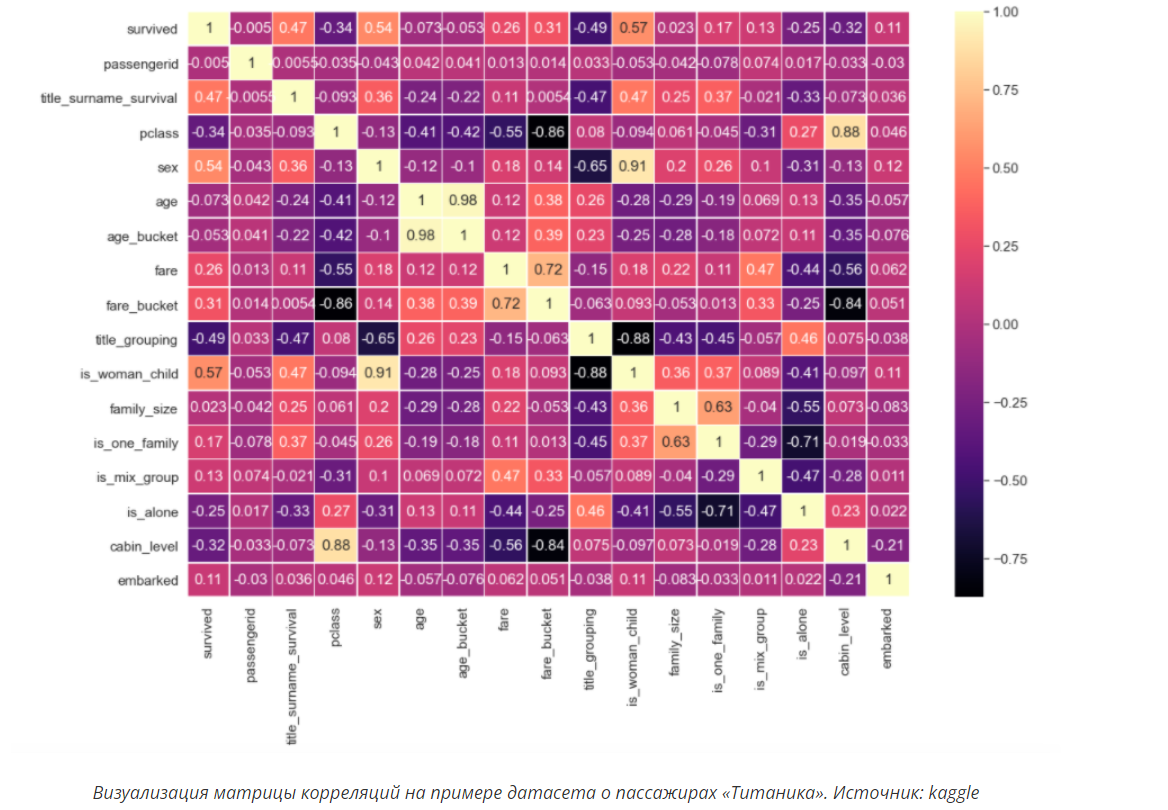

На рисунке вы можете увидеть визуализированную матрицу к одному из соревнований на kaggle. Наибольшая связь наблюдается в паре признаков age и age_bucket — 0.98, что по шкале корреляции является очень сильной связью и приводит к мультиколлинеарности признаков. Скорее всего, один из признаков будет исключён из датасета.

В нашей матрице датасета винных обзоров отражено всего два признака — points, price.  На пересечении признаков мы видим значение коэффициента корреляции между признаками points и price.

In [2]:
round(df[['points', 'price']].corr(), 6)

,points,price
points,1.000000,0.402137
price,0.402137,1.000000


Рассчитать коэффициент корреляции мы можем только в том случае, когда признак имеет численное выражение. Как мы выяснили ранее, остальные признаки — в строковом формате, и расчёт коэффициента корреляции невозможен.

<center><p style="border:4px aquamarine  dotted;  width:800px; text-align: center; padding: 10px">
Корреляция и причинно-следственная связь — это понятия, которые чаще всего ошибочно приравниваются друг к другу. Понимание корреляции важно для разведывательного анализа и помогает делать правильные выводы. 

<center>$\color{green}{\text{ЛОЖНАЯ КОРРЕЛЯЦИЯ}}$</center>

<p style="background: aquamarine;  width:960px; text-align: left; padding: 10px">
<b>Продажи мороженого коррелируют с убийствами!</b><br>
По мере роста или падения продаж замороженного десерта соответственно растёт или уменьшается количество убийств. Является ли потребление замороженного десерта причиной смерти людей?

Нет. Эти две вещи взаимосвязаны, но это не значит, что одна вызывает другую.

В некоторых случаях участвуют скрытые факторы. Например, в примере с мороженым улучшение погоды вызывает рост продаж десерта, а большое количество людей на улицах создаёт благоприятные условия для убийц.

Нет причинно-следственной связи между убийствами и продажей мороженого, а наличие третьего фактора — хорошей погоды — объясняет эти связи. Этот случай называется **ложной корреляцией**.

## 4. Типы корреляций. Корреляция Пирсона

<center>$\color{green}{\text{КОРРЕЛЯЦИЯ ПИРСОНА}}$</center>

<p style="background: aquamarine;  width:960px; text-align: left; padding: 10px">
<b>Коэффициент корреляции Пирсона</b> используется для вычисления линейной взаимосвязи между признаками. 

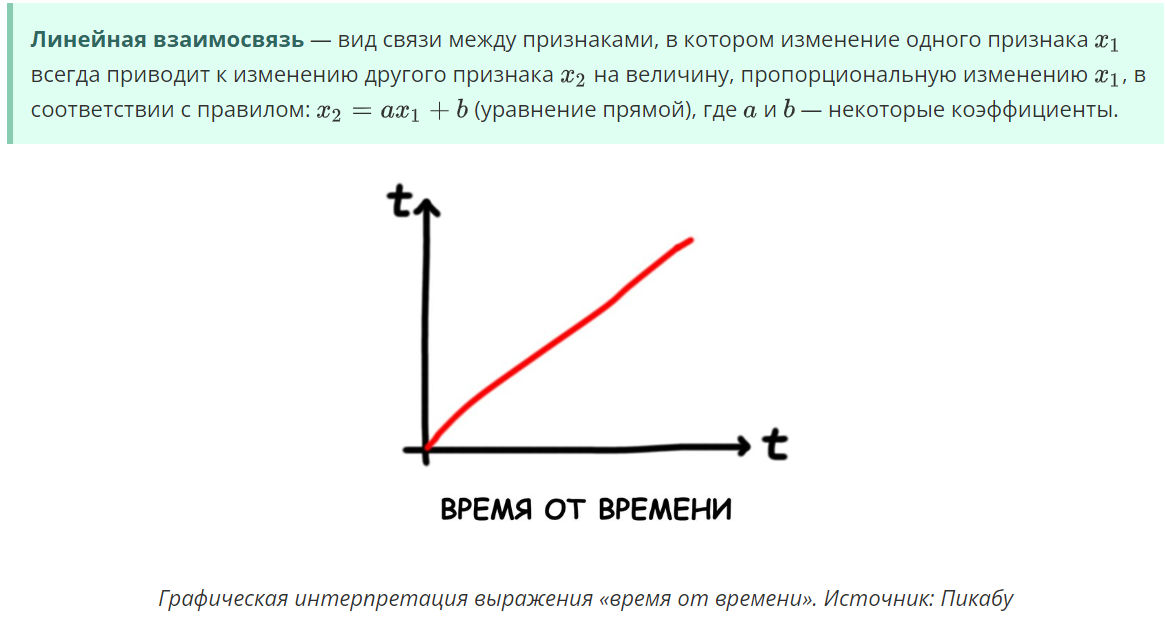

Для большинства непрерывных признаков это подходящий метод вычисления коэффициента корреляции. Однако при его использовании вы предполагаете, что признаки приблизительно нормально распределены и не имеют выбросов.

<center>НОРМАЛЬНОЕ РАСПРЕДЕЛЕНИЕ

Большинство окружающих нас процессов и явлений, характеристик объектов можно описать **нормальным распределением**. В основном это переменные, которые зависят от множества факторов, например рост человека. Он сформировался благодаря местности, в которой проживает человек, генетическим предрасположенностям, перенесённым заболеваниям и так далее. Как следствие, показатели роста подвергаются законам нормального распределения.

С точки зрения визуализации нормальное (гауссово) распределение представляет собой распределение признака в виде колокола.

Нормальность распределения признака можно определить визуально, построив гистограмму распределения непрерывного признака или так называемый q-q plot. Подробнее о принципе построения данного графика советуем прочитать [здесь](https://habr.com/ru/articles/578754/).

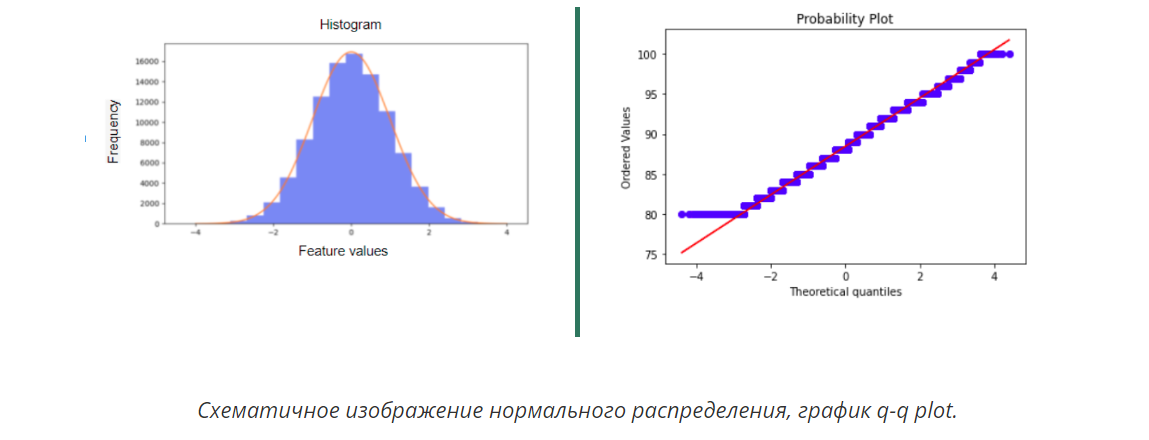

На гистограмме распределение должно напоминать колокол (левый график на рисунке), а **q-q plot** должен напоминать прямую линию (правый график на рисунке).

Давайте проверим наши данные винных обзоров на нормальность, используя метод визуализации.

Для этого воспользуемся пакетом [stats](https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats) статистических распределений и функций, а также знакомой нам библиотекой *matplotlib* для построения графиков.

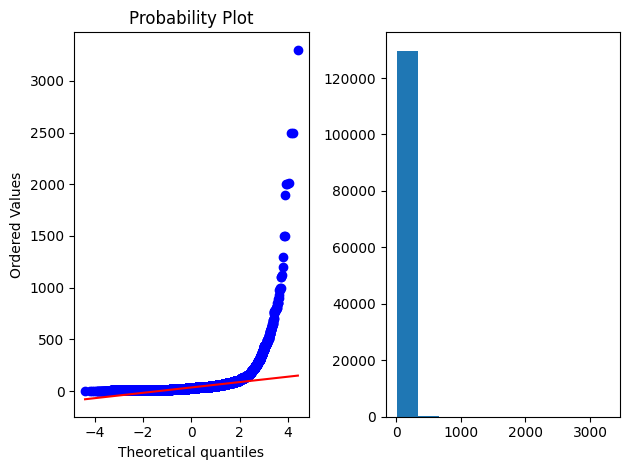

In [4]:
import matplotlib.pyplot as plt # библиотека визуализации
from scipy import stats # библиотека для расчетов

plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(df['price'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(df['price']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

<center><p style="border:4px aquamarine  dotted;  width:800px; text-align: center; padding: 10px">
Признак распределён ненормально, так как q-q plot имеет изогнутую линию, а гистограмма распределения совершенно не похожа на колокол.Такой признак при анализе Пирсоном может выдать некорректные результаты. Для таких случаев существуют другие виды корреляций или проводится операция по приведению признака к нормальному путём преобразований.

## 5. Типы корреляций. Ранговые корреляции

<p style="background: aquamarine;  width:960px; text-align: left; padding: 10px">
<b>Ранговая корреляция</b> — это вид корреляции, отражающий отношения переменных, упорядоченных по возрастанию их значения. Ранги — это порядковые номера единиц совокупности в упорядоченном (ранжированном) ряду. Если проранжировать совокупность по двум признакам, связь между которыми изучается, то полное совпадение рангов означает максимально тесную прямую связь, а полная противоположность рангов — максимально тесную обратную связь.

<center>$\color{green}{\text{КОРРЕЛЯЦИЯ СПИРМЕНА}}$</center>

<p style="background: aquamarine;  width:960px; text-align: left; padding: 10px">
<b>Коэффициент корреляции Спирмена</b> используется для вычисления взаимосвязей между категориальными переменными.

Чтобы рассчитать коэффициент корреляции Спирмена, вам необходимо передать в **df.corr()** аргумент *method = 'spearman'* .

 <p style="background: #E1DEDE; border:1px black  solid;  width:960px; text-align: left; padding: 10px">
Лучшим вариантом будет придерживаться правил корреляций каждого из методов: для непрерывных нормально распределённых используем корреляцию Пирсона, для категориальных — ранговую. Однако в спорных случаях мы рассматриваем несколько вариантов корреляций.<br>Иногда мы можем применить ранговую корреляцию и для числовых переменных, которые распределены ненормально или если между ними существует нелинейная связь. 

<p style="background: aquamarine;  width:960px; text-align: left; padding: 10px">
Например, в нашем случае один из признаков price распределён ненормально, связь между ними также не является линейной. Корреляция по Пирсону составляет 0.4, что говорит о слабой связи признаков. А корреляция по Спирмену составляет 0.58, что говорит о более сильной связи. Скорее всего, корреляция Спирмена в данном случае будет более верным вариантом, но для точного ответа нам необходимо будет удовлетворить условиям корреляции Спирмена или корреляции Пирсона.

<center>$\color{green}{\text{КОРРЕЛЯЦИЯ КЕНДАЛЛА}}$</center>

 <p style="background: #E1DEDE; border:1px black  solid;  width:960px; text-align: left; padding: 10px">
Корреляции Спирмена и Кендалла очень похожи. Чтобы понять их различия, необходимо глубокое погружение в их математическую природу. Однако в среднем корреляция Кендала выдаёт меньшие значения коэффициента корреляции, чем корреляция Спирмена<br>Корреляция Кендалла более устойчива к ошибкам и выбросам в данных. Это значит, что её можно применить до очистки данных, чтобы выявить взаимосвязи заранее.

<p style="background: aquamarine;  width:960px; text-align: left; padding: 10px">
В нашем случае корреляционный анализ показал нам явную связь цены за бутылку вина с её рейтингом. Она не является такой сильной связью, чтобы вызывать мультиколлинеарность. Также мы по-прежнему не можем сказать, что цена и рейтинг связаны напрямую, ведь корреляция не даёт нам причинно-следственных связей. Возможно, есть третья переменная, влияющая на эти оба признака.

<center>$\color{green}{\text{КОРРЕЛЯЦИЯ МЭТЬЮСА}}$</center>

<p style="background: aquamarine;  width:960px; text-align: left; padding: 10px">
<b>корреляция Мэтьюса</b> — мера силы связи между бинарными переменными.

Бинарные признаки являются подгруппой категориальных. Мы по-прежнему можем использовать методы ранговых корреляций для расчёта связи между переменными.

Для корреляции Мэтьюса, но мы можем воспользоваться библиотекой **scikit-learn** (библиотека с реализацией готовых алгоритмов для машинного обучения) и её функцией [**matthews_corrcoef()**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html#sklearn.metrics.matthews_corrcoef) для расчёта коэффициента корреляции Мэтьюса.

In [5]:
pip install scikit-learn #установим библиотеку scikit-learn.
from sklearn.metrics import matthews_corrcoef #импортируем нужную нам функцию для дальнейшей работы

SyntaxError: invalid syntax (3588323225.py, line 1)

В нашем датасете винных обзоров нет бинарных переменных, но мы можем воспользоваться учебным примером:

In [7]:
from sklearn.metrics import matthews_corrcoef

x = [+1, -1, +1, +1] # список значений признака х
y = [+1, +1, +1, -1] # список значений признака y

round(matthews_corrcoef(x, y), 2) # рассчитаем коэффициент корреляции Мэтьюса

-0.33

 <p style="background: #E1DEDE; border:1px black  solid;  width:960px; text-align: left; padding: 10px">
Коэффициент корреляции Мэтьюса может быть полезен в случае, когда в датасете представлены только бинарные переменные. Кроме того, этот коэффициент используется для оценки качества моделей, ответы которых также бинарны. 

 <p style="background: #E1DEDE; border:1px black  solid;  width:960px; text-align: left; padding: 10px">
<b>Важно</b>«по правилам» для категориальных переменных переменных могут быть использованы коэффициенты корреляции СПИРМЕНА и КЕНДАЛЛА, а для для бинарных переменных: коэффициенты корреляции СПИРМЕНА, КЕНДАЛЛА и МЭТЬЮСА

## 6. Визуализация корреляций. Матрица корреляций. График рассеивания. Парные отношения в наборе данных

Набор данных содержит ~600 записей о девушках и семь признаков:

- BMI — индекс массы тела (ИМТ)
- year — год размещения модели в журнале
- waist — обхват талии модели
- hips — обхват бёдер модели
- height — рост модели
- weight — вес модели
- waist/hip — соотношение обхвата талии и бёдер

In [8]:
data = pd.read_csv('data/model.csv')

<center>$\color{green}{\text{МАТРИЦА КОРРЕЛЯЦИЙ}}$</center>

In [10]:
round(data.corr(method='pearson'), 2)

,Year,Waist,Hips,Height,Weight,BMI,Waist/Hip
Year,1.00,0.29,-0.28,0.28,-0.01,0.03,0.46
Waist,0.29,1.00,0.28,0.37,0.45,0.14,0.74
Hips,-0.28,0.28,1.00,0.23,0.54,0.21,-0.42
Height,0.28,0.37,0.23,1.00,0.71,-0.04,0.20
Weight,-0.01,0.45,0.54,0.71,1.00,0.21,0.07
BMI,0.03,0.14,0.21,-0.04,0.21,1.00,-0.01
Waist/Hip,0.46,0.74,-0.42,0.20,0.07,-0.01,1.00


 <p style="background: #E1DEDE; border:1px black  solid;  width:960px; text-align: left; padding: 10px">
→ Матрица получилась большой и потребовалось достаточно много времени, чтобы проанализировать все коэффициенты в этой матрице. Поэтому специалисты по данным отдают предпочтение методам визуализации. Один из таких — <b>тепловая матрица корреляций</b>.

<center>$\color{green}{\text{ТЕПЛОВАЯ МАТРИЦА КОРРЕЛЯЦИЙ}}$</center>

 <p style="background: #E1DEDE; border:1px black  solid;  width:960px; text-align: left; padding: 10px">
Для построения тепловой матрицы корреляций мы воспользуемся методом sns.heatmap() библиотеки seaborn. 

In [12]:
import seaborn as sns #Для построения тепловой матрицы корреляций мы воспользуемся методом sns.heatmap() библиотеки seaborn. 

Метод принимает на вход двумерный массив данных под аргументом data. Это может быть матрица корреляций, полученная методом **df.corr()**, матрица пропущенных значений, полученная методом **df.isnull()**, набор данных и многое другое. 

Чтобы было удобнее её интерпретировать, передадим параметр **annot = True**, чтобы отобразить коэффициент корреляции на пересечении признаков.

<Axes: >

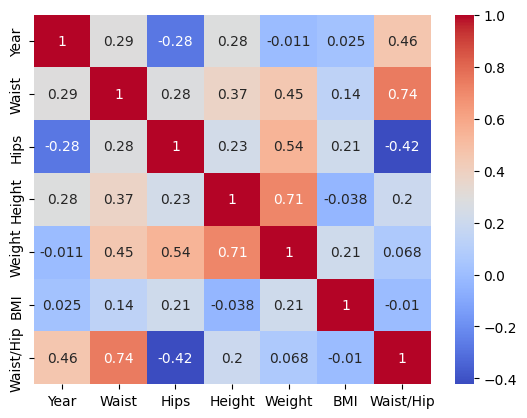

In [16]:
sns.heatmap(data.corr(), annot = True, cmap= 'coolwarm') #Передадим в метод heatmap() нашу матрицу корреляций corr() 
# и передадим параметр annot = True, чтобы отобразить коэффициент корреляции на пересечении признаков

Такую тепловую матрицу очень удобно интерпретировать: в оттенках красного отражена положительная корреляция между признаками, в синих — отрицательная корреляция. Например, самая большая отрицательная взаимосвязь составляет -0.42, а самая большая положительная — 0.74.

<center><p style="border:4px aquamarine  dotted;  width:800px; text-align: center; padding: 10px">
С помощью такой матрицы очень удобно оценивать мультиколлинеарность в данных, делать выводы о связях между признаками

Например, в нашем наборе данных мультиколлинеарность практически отсутствует, так как из материала прошлого модуля мы знаем, что она возникает из-за признаков с сильной и очень сильной корреляцией. По шкале корреляций это от 0.7 и выше; у нас есть такие признаки с корреляцией выше 0.7 (например: waist/hip + waist). Коэффициент корреляции лишь немного выше, поэтому такой признак, скорее всего, не будет удалён из набора данных. 

Также у метода heatmap имеется много аргументов, которые позволяют настроить цветовую гамму графика, управлять его элементами и отображением. Подробнее об этом вы прочтёте здесь: [Seaborn Heatmaps: 13 способов настроить визуализацию матрицы корреляции](https://datastart.ru/blog/read/seaborn-heatmaps-13-sposobov-nastroit-vizualizaciyu-matricy-korrelyacii).

<center>$\color{green}{\text{SCATTERPLOT}}$</center>

Иногда нам необходимо рассмотреть связь между признаками как распределение. Матрица корреляции может показать нам только силу связи и её направление (плюс/минус). Чтобы рассмотреть распределение и характер связи, существует **точечная диаграмма рассеивания**.

<p style="background: aquamarine;  width:960px; text-align: left; padding: 10px">
<b>Точечная диаграмма рассеивания</b> — это такая диаграмма, в которой каждое значение, которое принимает признак в датасете, отражено точкой.

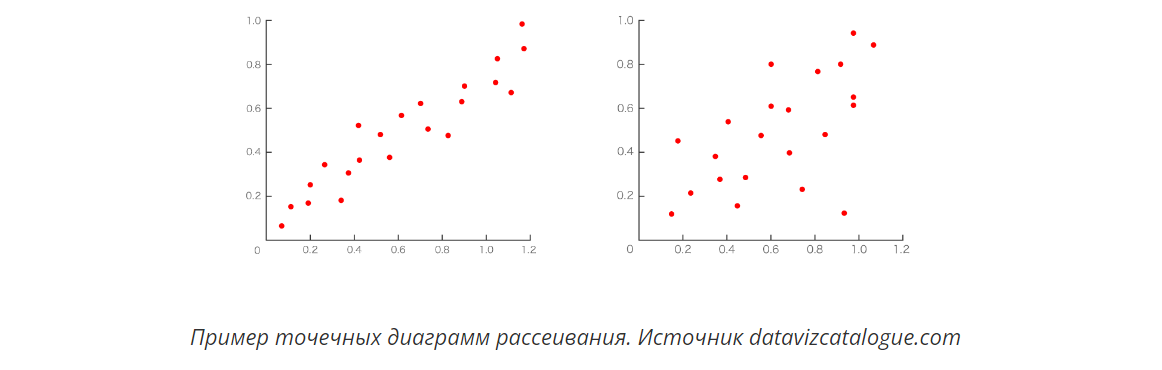

Подобная диаграмма помогает установить характер и силу связи признаков. Присвоив каждой оси переменную, мы можем определить наличие связи между переменными. Сила связи (коэффициент корреляции) зависит от того, насколько плотно расположены точки на диаграмме. Например, на рисунке слева точки расположены более плотно, чем справа. Это означает большую силу связи. 

✏️ Построим такой график на примере нашего датасета и рассмотрим его детально.Возьмём для примера две пары признаков:

- по оси x="Waist/Hip" — соотношение обхвата талии/бедер, по оси y="Waist" — обхват талии;
- по оси x="Weight" — вес модели, а по оси y="Year" — год размещения модели в журнале.
Построим для них точечную диаграмму с использованием Метода — **sns.scatterplot()**:

<Axes: xlabel='Waist/Hip', ylabel='Waist'>

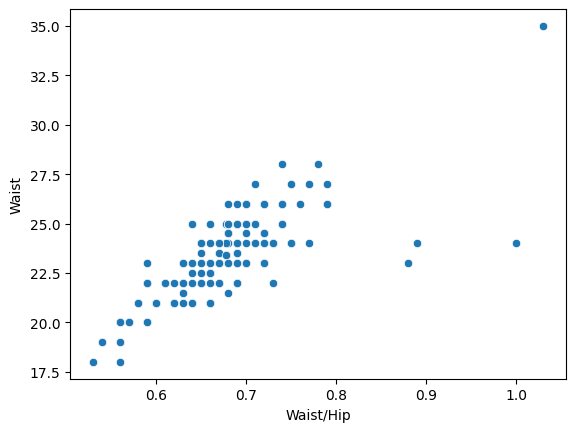

In [17]:
sns.scatterplot(data=data, x="Waist/Hip", y="Waist")

<Axes: xlabel='Weight', ylabel='Year'>

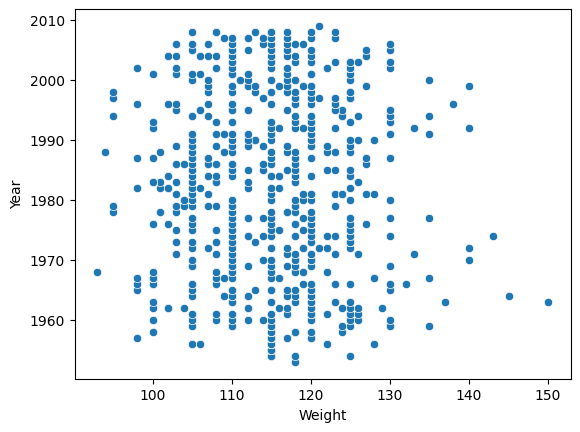

In [18]:
sns.scatterplot(data=data, x="Weight", y="Year")

<center><p style="border:4px aquamarine  dotted;  width:800px; text-align: center; padding: 10px">
Сравнив эти два графика, мы можем сказать, что в первой паре признаков связь видна более отчётливо, точки больше прижаты друг к другу и выстроены визуально в линию. Эта линия похожа на рассматриваемую нами в прошлом юните линейную связь. Во второй паре признаков они распределены по всему пространству — трудно выявить основную массу признаков, связь кажется очень слабой.

И если мы вернёмся к тепловой матрице корреляций, то увидим, что в первом случае корреляция составила 0.74, а во втором -0.011 — очень слабая связь. Получается, что при помощи графиков мы можем оценить коэффициент корреляции на глаз. 

 <p style="background: #E1DEDE; border:1px black  solid; text-align: left; padding: 10px">
Умение интерпретировать графики очень важно для дата-сайентиста и сокращает время работы над разведывательным анализом данных. Опытным специалистам по данным требуется несколько секунд, чтобы определить характер связи: линейная/нелинейная, прямая/обратная, — а также силу связи, или коэффициент корреляции. 

Чтобы делать это так же быстро, необходимо помнить несколько правил:

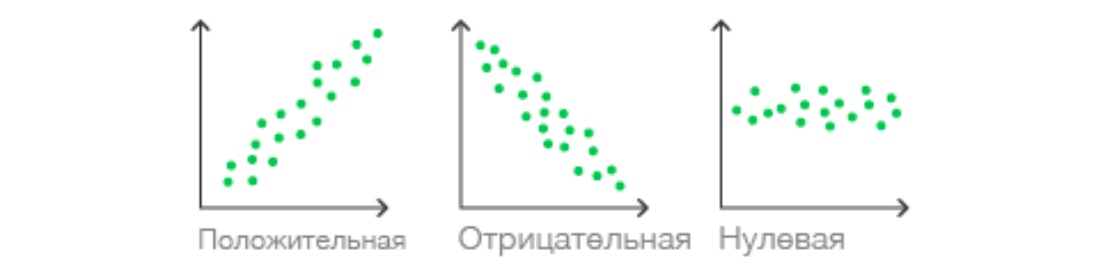

- При **положительной корреляции** увеличение одного признака приводит к увеличению другого. И наоборот.
- При **отрицательной связи** увеличение одного из признаков приводит к уменьшению другого и наоборот.
- При **нулевой корреляции** признаки распределяются независимо друг от друга, что видно на рисунке

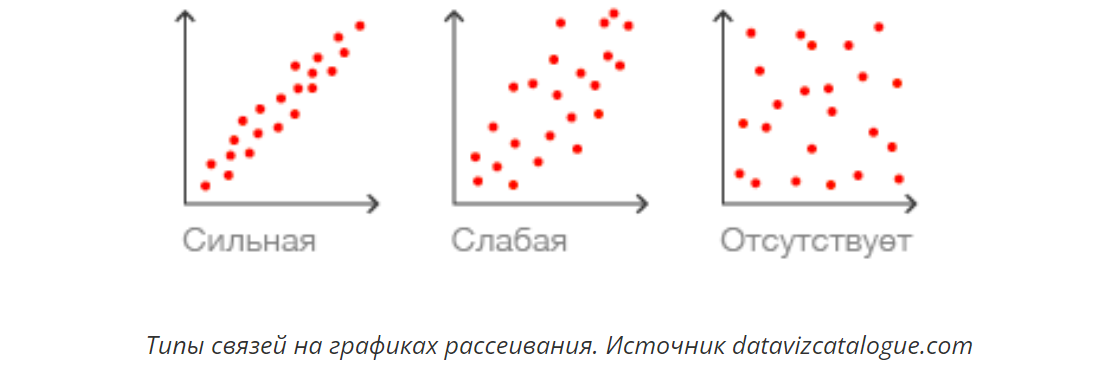

При сильной связи точки на графике расположены близко друг к другу. Чем связь слабее, тем дальше находятся точки друг от друга. На графике изображена сильная связь с коэффициентом корреляции ~0.95, слабая с коэффициентом корреляции ~0.5 и нулевая корреляция.

<center><p style="border:4px aquamarine  dotted;  width:800px; text-align: center; padding: 10px">
Диаграмма рассеивания в данных — удобный инструмент анализа, но, к сожалению, только для пары признаков. Тепловая матрица корреляций удобна для анализа всего датасета, но показывает только силу и направления корреляции (плюс/минус), а информации о распределении признаков мы не получаем. 

График попарных отношений в библиотеке seaborn объединяет лучшее из этих подходов:

<center>$\color{green}{\text{ГРАФИК ПОПАРНЫХ ОТНОШЕНИЙ PAIRPLOT}}$</center>

Построим график [PairPlot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) для нашего набора данных:

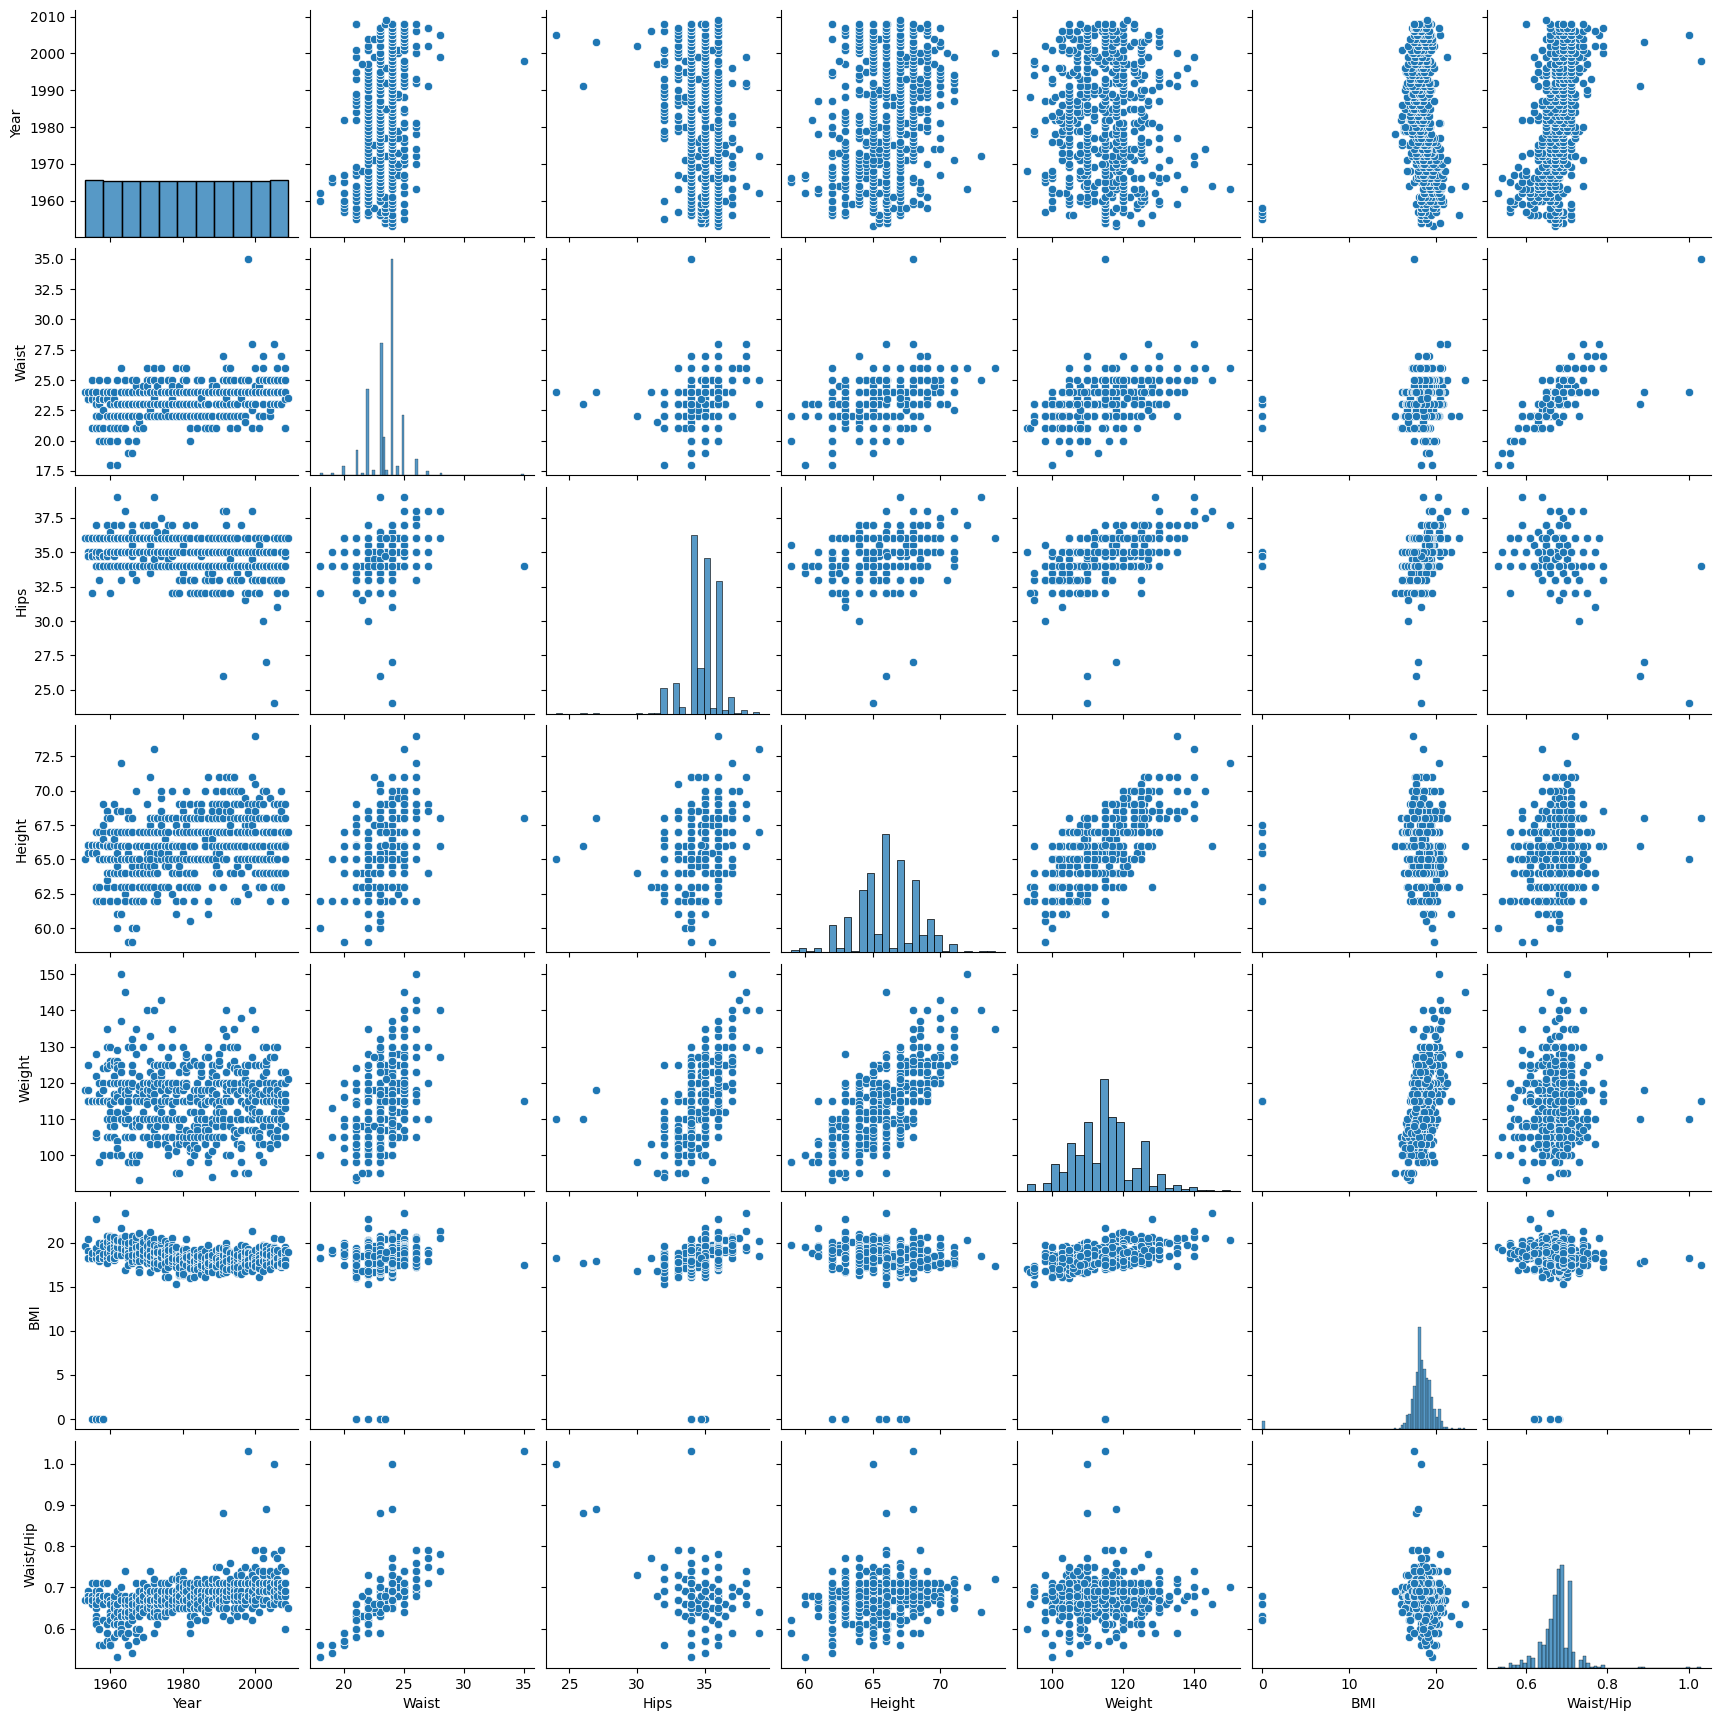

In [19]:
sns.pairplot(data)

Мы можем увидеть в таком графике признаки weight (вес модели) и height (рост модели) распределены почти нормально, они выделены на рисунке ниже $\color{red}{\text{красным}}$ кругом. Это видно на графике распределения. 

Также интересна связь на пересечении двух признаков. Диаграмма рассеяния линейна, вытянута вдоль прямой. Она положительна — с увеличением одной переменной растёт значение другой. Она ближе к сильной связи — точки расположены близко друг к другу. Можно сделать предположение о коэффициенте корреляции примерно ~0,7.

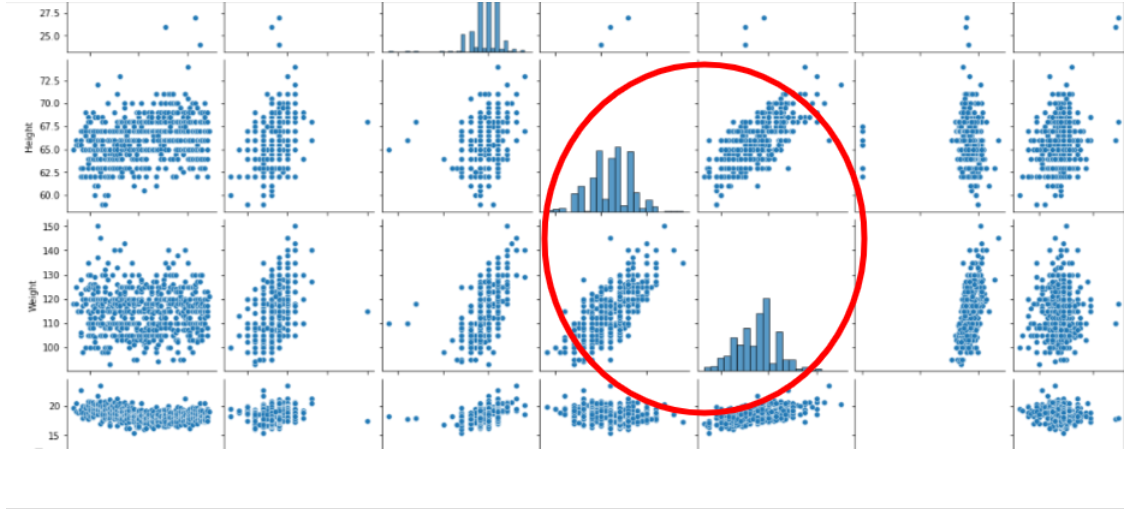

[→ Игра Guess the Correlation](https://www.guessthecorrelation.com/)

Браузерная игра Guess the Correlation была разработана для понимания корреляции в диаграммах рассеяния. Игрокам показывают диаграммы рассеяния, изображающие взаимосвязь между двумя случайными величинами, и просят угадать, насколько они положительно коррелированы. Выбросы заставляют игроков переоценивать или занижать истинную корреляцию. 